In [133]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [15]:
# Read the data
file_path = Path(r"Data files\final_combined_data_cleaned.csv")
data_df = pd.read_csv(file_path)
data_df.head()

,State,County,Census Tract Number,Life Expectancy Mean,Life Expectancy Range,Life Expectancy Standard Error,County.1,County with State,State ID,State Name,...,Population per Square Mile,Accommodation and Food Services Sales,Retail Sales,Firms Total,Women Owned Firms,Men Owned Firms,Minority Owned Firms,Nonminority Owned Firms,Veteran Owned Firms,NonVeteran Owned Firms
0,Alabama,"Autauga County, AL",201.0,73.1,56.9-75.1,2.2348,Autauga,Autauga County,AL,Alabama,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
1,Alabama,"Autauga County, AL",202.0,76.9,75.2-77.5,3.3453,Autauga,Autauga County,AL,Alabama,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
2,Alabama,"Autauga County, AL",204.0,75.4,75.2-77.5,1.0216,Autauga,Autauga County,AL,Alabama,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
3,Alabama,"Autauga County, AL",205.0,79.4,77.6-79.5,1.1768,Autauga,Autauga County,AL,Alabama,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
4,Alabama,"Autauga County, AL",206.0,73.1,56.9-75.1,1.5519,Autauga,Autauga County,AL,Alabama,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401


In [16]:
data_trimmed_df = data_df.drop(columns=['State', 'County', 'Census Tract Number', 'Life Expectancy Range', 'Life Expectancy Standard Error', 'County.1',
                                        'County with State', 'State ID', 'State Name', 'Latitude', 'Longitude', 'County, State'])

data_trimmed_df.head()

,Life Expectancy Mean,Population,Life Expectancy Low,Life Expectancy High,Percentage 65 and Older,Percentage Under 18 Years,Percentage Under 5 Years,Bachelor's Degree or Higher,High School or Higher,Nonemployer Establishments,...,Population per Square Mile,Accommodation and Food Services Sales,Retail Sales,Firms Total,Women Owned Firms,Men Owned Firms,Minority Owned Firms,Nonminority Owned Firms,Veteran Owned Firms,NonVeteran Owned Firms
0,73.1,58761.0,56.9,75.1,16.0,23.2,5.9,26.6,88.5,3350,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
1,76.9,58761.0,75.2,77.5,16.0,23.2,5.9,26.6,88.5,3350,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
2,75.4,58761.0,75.2,77.5,16.0,23.2,5.9,26.6,88.5,3350,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
3,79.4,58761.0,77.6,79.5,16.0,23.2,5.9,26.6,88.5,3350,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401
4,73.1,58761.0,56.9,75.1,16.0,23.2,5.9,26.6,88.5,3350,...,91.8,93431,607854,2949,1093,1499,616,2160,285,2401


In [17]:
data_trimmed_df.nunique()

Life Expectancy Mean                             318
Population                                      2994
Life Expectancy Low                                5
Life Expectancy High                               5
Percentage 65 and Older                          268
Percentage Under 18 Years                        219
Percentage Under 5 Years                          89
Bachelor's Degree or Higher                      438
High School or Higher                            304
Nonemployer Establishments                      2386
American Indian and Alaska Native %              196
Asian %                                          138
Black %                                          489
Hispanic or Latino %                             458
Native Hawaiian and Other Pacific Islander %      27
Two or More Races %                               98
White %                                          566
White, not Hispanic or Latino %                  689
Homeownership Rate                            

In [71]:
# Select y values
y = data_trimmed_df['Life Expectancy Mean'].values

In [72]:
# Select Per Capita Income and Population Density for X values
X_1 = data_trimmed_df[['Per Capita Income']].values
X_2 = data_trimmed_df[['Per Capita Income', 'Population per Square Mile']].values
X_3 = data_trimmed_df[['Per Capita Income', 'Population per Square Mile', 'Bachelor\'s Degree or Higher']].values
X_4 = data_trimmed_df[['Per Capita Income', 'Population per Square Mile', 'Bachelor\'s Degree or Higher', 'White %']].values


In [73]:
# Split the data into test and train
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, random_state=1)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, random_state=2)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y, random_state=3)
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y, random_state=4)



In [98]:
# Create four StandardScaler instances
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_3 = StandardScaler()
scaler_4 = StandardScaler()

# Fit the StandardScaler
X_1_scaler = scaler_1.fit(X_1_train)
X_2_scaler = scaler_2.fit(X_2_train)
X_3_scaler = scaler_3.fit(X_3_train)
X_4_scaler = scaler_4.fit(X_4_train)

# Scale the data
X_1_train_scaled = X_1_scaler.transform(X_1_train)
X_1_test_scaled = X_1_scaler.transform(X_1_test)

X_2_train_scaled = X_2_scaler.transform(X_2_train)
X_2_test_scaled = X_2_scaler.transform(X_2_test)

X_3_train_scaled = X_3_scaler.transform(X_3_train)
X_3_test_scaled = X_3_scaler.transform(X_3_test)

X_4_train_scaled = X_4_scaler.transform(X_4_train)
X_4_test_scaled = X_4_scaler.transform(X_4_test)

In [101]:
# X_1 Model

In [102]:
# Define the model - deep neural net
number_input_features = len(X_1_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 4

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 16        
                                                                 
 dense_37 (Dense)            (None, 4)                 36        
                                                                 
 dense_38 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
# Compile the model
nn_1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [104]:
# Train the model
fit_model_1 = nn_1.fit(X_1_train_scaled,y_1_train,epochs=50)

Epoch 1/50
1535/1535 [==============================] - 3s 1ms/step - loss: 2082.3494 - mse: 2082.3494
Epoch 2/50
1535/1535 [==============================] - 2s 1ms/step - loss: 31.9934 - mse: 31.9934
Epoch 3/50
1535/1535 [==============================] - 2s 1ms/step - loss: 16.5324 - mse: 16.5324
Epoch 4/50
1535/1535 [==============================] - 2s 1ms/step - loss: 14.1187 - mse: 14.1187
Epoch 5/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.8693 - mse: 13.8693
Epoch 6/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.8559 - mse: 13.8559
Epoch 7/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.8491 - mse: 13.8491
Epoch 8/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.8560 - mse: 13.8560
Epoch 9/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.8693 - mse: 13.8693
Epoch 10/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.8456 - mse: 13.8456
Epoch

In [105]:
# Evaluate the model using the test data
model_1_loss, model_1_mse = nn_1.evaluate(X_1_test_scaled,y_1_test,verbose=2)
print(f"Loss: {model_1_loss}, Mean Squared Error: {model_1_mse}")

512/512 - 1s - loss: 13.6402 - mse: 13.6402 - 627ms/epoch - 1ms/step
Loss: 13.640164375305176, Mean Squared Error: 13.640164375305176


In [106]:
# X_2 Model

In [110]:
# Define the model - deep neural net
number_input_features = len(X_2_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 4

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 8)                 24        
                                                                 
 dense_46 (Dense)            (None, 4)                 36        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
# Compile the model
nn_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [112]:
# Train the model
fit_model_2 = nn_2.fit(X_2_train_scaled,y_2_train,epochs=50)

Epoch 1/50
1535/1535 [==============================] - 3s 1ms/step - loss: 2341.4202 - mse: 2341.4202
Epoch 2/50
1535/1535 [==============================] - 2s 1ms/step - loss: 50.8072 - mse: 50.8072
Epoch 3/50
1535/1535 [==============================] - 2s 1ms/step - loss: 19.5390 - mse: 19.5390
Epoch 4/50
1535/1535 [==============================] - 2s 1ms/step - loss: 15.2546 - mse: 15.2546
Epoch 5/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.9782 - mse: 13.9782
Epoch 6/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.7253 - mse: 13.7253
Epoch 7/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.6319 - mse: 13.6319
Epoch 8/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.5789 - mse: 13.5789
Epoch 9/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.5560 - mse: 13.5560
Epoch 10/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.5366 - mse: 13.5366
Epoch

In [113]:
# Evaluate the model using the test data
model_2_loss, model_2_mse = nn_2.evaluate(X_2_test_scaled,y_2_test,verbose=2)
print(f"Loss: {model_2_loss}, Mean Squared Error: {model_2_mse}")

512/512 - 1s - loss: 13.7063 - mse: 13.7063 - 632ms/epoch - 1ms/step
Loss: 13.706299781799316, Mean Squared Error: 13.706299781799316


In [114]:
# X_3 Model

In [115]:
# Define the model - deep neural net
number_input_features = len(X_3_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 4

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn_3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 8)                 32        
                                                                 
 dense_49 (Dense)            (None, 4)                 36        
                                                                 
 dense_50 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
# Compile the model
nn_3.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [117]:
# Train the model
fit_model_3 = nn_3.fit(X_3_train_scaled,y_3_train,epochs=50)

Epoch 1/50
1535/1535 [==============================] - 3s 1ms/step - loss: 1933.0919 - mse: 1933.0919
Epoch 2/50
1535/1535 [==============================] - 2s 1ms/step - loss: 62.2050 - mse: 62.2050
Epoch 3/50
1535/1535 [==============================] - 2s 1ms/step - loss: 19.5788 - mse: 19.5788
Epoch 4/50
1535/1535 [==============================] - 2s 1ms/step - loss: 15.6209 - mse: 15.6209
Epoch 5/50
1535/1535 [==============================] - 2s 1ms/step - loss: 14.8720 - mse: 14.8720
Epoch 6/50
1535/1535 [==============================] - 2s 1ms/step - loss: 14.2036 - mse: 14.2036
Epoch 7/50
1535/1535 [==============================] - 2s 1ms/step - loss: 14.0097 - mse: 14.0097
Epoch 8/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.8963 - mse: 13.8963
Epoch 9/50
1535/1535 [==============================] - 2s 2ms/step - loss: 13.8477 - mse: 13.8477
Epoch 10/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.7615 - mse: 13.7615
Epoch

In [118]:
# Evaluate the model using the test data
model_3_loss, model_3_mse = nn_3.evaluate(X_3_test_scaled,y_3_test,verbose=2)
print(f"Loss: {model_3_loss}, Mean Squared Error: {model_3_mse}")

512/512 - 1s - loss: 13.5747 - mse: 13.5747 - 639ms/epoch - 1ms/step
Loss: 13.574668884277344, Mean Squared Error: 13.574668884277344


In [119]:
# X_4 Model

In [120]:
# Define the model - deep neural net
number_input_features = len(X_4_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 4

nn_4 = tf.keras.models.Sequential()

# First hidden layer
nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_4.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn_4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 8)                 40        
                                                                 
 dense_52 (Dense)            (None, 4)                 36        
                                                                 
 dense_53 (Dense)            (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
# Compile the model
nn_4.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [122]:
# Train the model
fit_model_4 = nn_4.fit(X_4_train_scaled,y_4_train,epochs=50)

Epoch 1/50
1535/1535 [==============================] - 3s 1ms/step - loss: 2258.5652 - mse: 2258.5652
Epoch 2/50
1535/1535 [==============================] - 2s 1ms/step - loss: 70.8526 - mse: 70.8526
Epoch 3/50
1535/1535 [==============================] - 2s 1ms/step - loss: 22.1701 - mse: 22.1701
Epoch 4/50
1535/1535 [==============================] - 2s 2ms/step - loss: 15.4553 - mse: 15.4553
Epoch 5/50
1535/1535 [==============================] - 2s 1ms/step - loss: 14.1631 - mse: 14.1631
Epoch 6/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.6908 - mse: 13.6908
Epoch 7/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.4894 - mse: 13.4894
Epoch 8/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.4007 - mse: 13.4007
Epoch 9/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.3398 - mse: 13.3398
Epoch 10/50
1535/1535 [==============================] - 2s 1ms/step - loss: 13.2721 - mse: 13.2721
Epoch

In [123]:
# Evaluate the model using the test data
model_4_loss, model_4_mse = nn_4.evaluate(X_4_test_scaled,y_4_test,verbose=2)
print(f"Loss: {model_4_loss}, Mean Squared Error: {model_4_mse}")

512/512 - 1s - loss: 13.3782 - mse: 13.3782 - 622ms/epoch - 1ms/step
Loss: 13.378159523010254, Mean Squared Error: 13.378159523010254


In [125]:
# Summary

In [126]:
print("Loss Statistics For Models 1 To 4")
print(f"Model 1: {model_1_loss}")
print(f"Model 2: {model_2_loss}")
print(f"Model 3: {model_3_loss}")
print(f"Model 4: {model_4_loss}")

Loss Statistics For Models 1 To 4
Model 1: 13.640164375305176
Model 2: 13.706299781799316
Model 3: 13.574668884277344
Model 4: 13.378159523010254


In [139]:
# Create random input data for model
num_samples = 1000
input_dim = len(X_4_train[0])
input_data = np.random.randn(num_samples, input_dim)

# Get activations for input layers
layer_outputs = [layer.output for layer in nn_4.layers[:2]]

activation_model = models.Model(inputs=nn_4.input, outputs=layer_outputs)
activations = activation_model.predict(input_data)

fig, axs = plt.subplots(1,2,figsize=(12,6))

# Visualize activation maps
for i, activation in enumerate(activations):
    im = axs[i].matshow(activation, cmap='viridis')
    axs[i].set_title('Activation Map for Layer {}'.format(i+1))
    axs[i].set_xlabel('Neuron Index')
    axs[i].set_ylabel('Sample Index')

fig.colorbar(im, ax=axs.ravel().tolist(), orientation='vertical')
plt.tight_layout()
plt.savefig('Charts/activation_map.png')
plt.show()

AttributeError: 'list' object has no attribute 'Model'

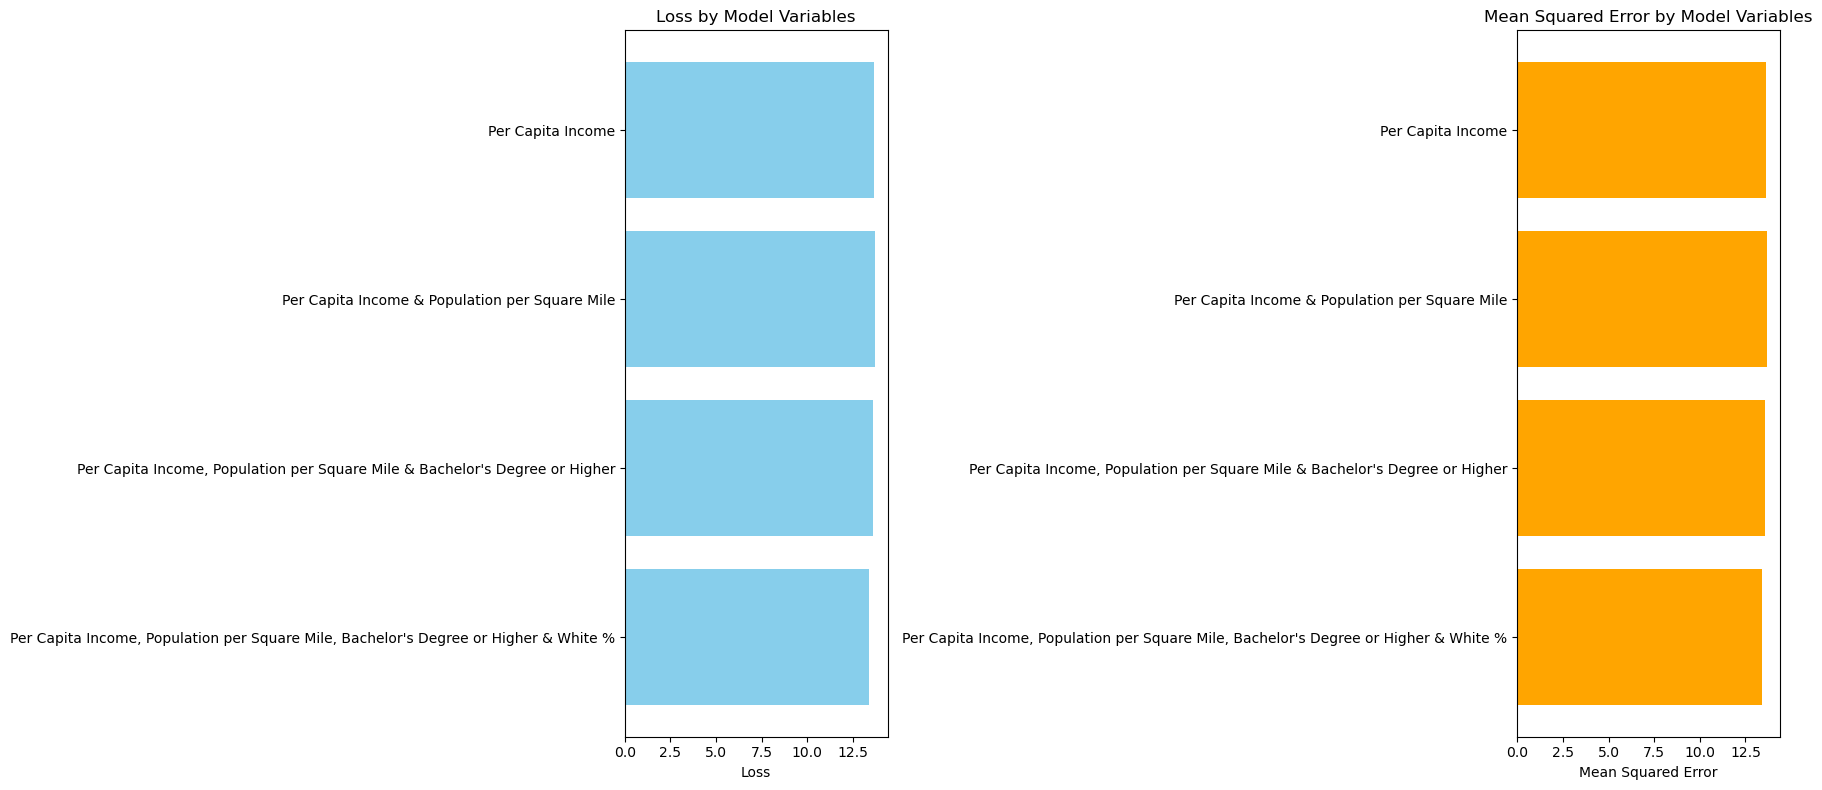

In [138]:
import matplotlib.pyplot as plt
import os
# Ensure the directory exists
output_dir = "/Charts"
os.makedirs(output_dir, exist_ok=True)
# Model names with specific variables they are testing
models = ['Per Capita Income',
          'Per Capita Income & Population per Square Mile',
          'Per Capita Income, Population per Square Mile & Bachelor\'s Degree or Higher',
          'Per Capita Income, Population per Square Mile, Bachelor\'s Degree or Higher & White %']
# Loss and MSE for each model
loss = [13.640164375305176, 13.706299781799316, 13.574668884277344, 13.378159523010254]
mse = [13.640164375305176, 13.706299781799316, 13.574668884277344, 13.378159523010254]
fig, ax = plt.subplots(1, 2, figsize=(18, 8), dpi=100)
# Plotting loss
ax[0].barh(models, loss, color='skyblue')
ax[0].set_title('Loss by Model Variables')
ax[0].set_xlabel('Loss')
ax[0].invert_yaxis()  # To have the first model at the top
# Plotting MSE
ax[1].barh(models, mse, color='orange')
ax[1].set_title('Mean Squared Error by Model Variables')
ax[1].set_xlabel('Mean Squared Error')
ax[1].invert_yaxis()  # To maintain consistency with the loss plot
plt.tight_layout()
# Save the figure
plt.savefig('Charts/model_performance_charts.png')
# Show the plot in the notebook
plt.show()